<a href="https://colab.research.google.com/github/malcolmrite-dsi/WSB_Stock_Screener/blob/main/Reddit_Stock_Scanner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the Libraries

In [2]:
!pip install praw

Reference: https://www.storybench.org/how-to-scrape-reddit-with-python/



*   PRAW:  Python Reddit API Wrapper, allows easy access to Reddit Data
*   Pandas: To handle the data from the scraping in well formatted tables
*   datetime: To convert the raw date format into an understandable format



In [3]:
import praw
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt


# Getting the Data from Reddit

Function Definitions









In [4]:
def authorise_extractor(twofactorcode):
    #Initialising the credentials for the API
    reddit = praw.Reddit(client_id='1h1Pkh53dcBSLA', \
                             client_secret='Lm4-BO2A5GpHoYnzEUEMMLOoH1TpIw', \
                             user_agent='Reddit_Stock by u/Get_Rich_Bot', \
                             username='Get_Rich_Bot', \
                             password= f'B+4H-5yww=<QJUV:{twofactorcode}')
    return reddit
    
    
def test_extractor(self):
    #Testing if the authorisation worked
    #For Reference: https://praw.readthedocs.io/en/latest/getting_started/quick_start.html
    print(self.read_only)
    
    # assume you have a reddit instance bound to variable `reddit`
    #Setting the subreddit to wallstreetbets
    subreddit = self.subreddit("wallstreetbets")
    
    #Validate that the subreddit extractor is working
    print(subreddit.display_name)
    print(subreddit.title)
    print(self.user.me())
    
    #Getting example submissions from the subreddit
    for submission in subreddit.top(limit=15):
        print(submission.title)  # Output: the submission's title
        print(submission.score)  # Output: the submission's score
        print(submission.id)     # Output: the submission's ID
        print(submission.url)    # Output: the URL the submission points to
                                # or the submission's URL if it's a self post

#For Reference: https://www.storybench.org/how-to-scrape-reddit-with-python/
def get_date(created):
        return dt.datetime.fromtimestamp(created)
    
#Returns a dataframe of the top reddit posts from WSB
def extract_top_data(self, posts):
    #Setting the subreddit to wallstreetbets
    subreddit = self.subreddit("wallstreetbets")
    #Create a dictionary to store the data   
                                
    topics_dict = { "title":[], \
                    "score":[], \
                    "id":[], \
                    "url":[], \
                    "comms_num": [], \
                    "created": [], \
                    "body":[]}
    
    #Extract the top posts with an upper limit defined by the user
    top_subreddit = subreddit.top(limit=posts)
    
    #Extract the relevant data from the subreddit
    for submission in top_subreddit:
        topics_dict["title"].append(submission.title)
        topics_dict["score"].append(submission.score)
        topics_dict["id"].append(submission.id)
        topics_dict["url"].append(submission.url)
        topics_dict["comms_num"].append(submission.num_comments)
        topics_dict["created"].append(submission.created)
        topics_dict["body"].append(submission.selftext)
        
    topics_data = pd.DataFrame(topics_dict)
    
    _timestamp = topics_data["created"].apply(get_date)
    topics_data = topics_data.assign(timestamp = _timestamp)

    return topics_data

## Officially Getting the Data

In [6]:
reddit = authorise_extractor("978487")

train_data = extract_top_data(reddit, 200)

print(train_data.head())

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



                                               title  ...           timestamp
0                             Times Square right now  ... 2021-01-31 02:00:38
1             UPVOTE so everyone sees we got SUPPORT  ... 2021-01-28 21:40:34
2                      GME YOLO update — Jan 28 2021  ... 2021-01-29 05:06:23
3               GME YOLO month-end update — Jan 2021  ... 2021-01-30 05:04:45
4  CLASS ACTION AGAINST ROBINHOOD. Allowing peopl...  ... 2021-01-28 21:49:11

[5 rows x 8 columns]


In [7]:
train_data

,title,score,id,url,comms_num,created,body,timestamp
0,Times Square right now,370255,l8rf4k,https://v.redd.it/x64z70f7eie61,11925,1.612058e+09,,2021-01-31 02:00:38
1,UPVOTE so everyone sees we got SUPPORT,300233,l6wu59,https://i.redd.it/sgoqy8nyt2e61.png,12756,1.611870e+09,,2021-01-28 21:40:34
2,GME YOLO update — Jan 28 2021,268408,l78uct,https://i.redd.it/opzucppb15e61.png,24184,1.611897e+09,,2021-01-29 05:06:23
3,GME YOLO month-end update — Jan 2021,242326,l846a1,https://i.redd.it/r557em3t5ce61.png,21021,1.611983e+09,,2021-01-30 05:04:45
4,CLASS ACTION AGAINST ROBINHOOD. Allowing peopl...,217072,l6x130,https://www.reddit.com/r/wallstreetbets/commen...,18545,1.611871e+09,LEAVE ROBINHOOD. They dont deserve to make mon...,2021-01-28 21:49:11
...,...,...,...,...,...,...,...,...
195,SEC Intern pls read: False media reports about...,61525,la1cxi,https://www.reddit.com/r/wallstreetbets/commen...,925,1.612209e+09,"Dear SEC Intern,\n\nSorry not sorry you worked...",2021-02-01 19:48:36
196,WSB Hedge Fund,61412,l66qot,https://i.redd.it/r5lqwhyp7wd61.jpg,1689,1.611790e+09,,2021-01-27 23:24:55
197,"It's not about the money, it's about sending a...",60060,l6ulcx,https://v.redd.it/6j75regs72e61,1134,1.611863e+09,,2021-01-28 19:37:41
198,Message from a TSLA veteran: Shut the fuck up ...,59965,lbdi8m,https://www.reddit.com/r/wallstreetbets/commen...,3292,1.612349e+09,Every other comment right now is a shill lamen...,2021-02-03 10:38:54


# Exploratory Data Analysis

In [23]:
train_data.describe()

,score,comms_num,created,sentiment
count,200.000000,200.000000,2.000000e+02,200.000000
mean,105630.255000,5101.170000,1.611492e+09,0.038882
std,46742.186026,8543.209258,3.265995e+06,0.263377
min,58769.000000,369.000000,1.587461e+09,-1.000000
25%,72557.000000,1710.500000,1.611880e+09,0.000000
50%,89006.500000,2903.000000,1.611974e+09,0.000000
75%,126848.000000,5351.250000,1.612189e+09,0.000000
max,370255.000000,82085.000000,1.612561e+09,1.000000


In [9]:
train_data.dtypes

title                object
score                 int64
id                   object
url                  object
comms_num             int64
created             float64
body                 object
timestamp    datetime64[ns]
dtype: object

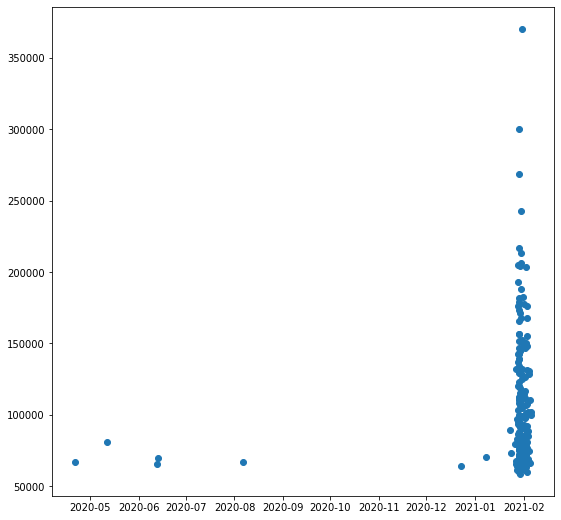

In [10]:
plt.figure(figsize=(9,9))
plt.scatter(train_data.timestamp, train_data.score)
plt.show()

# Text Extraction

In [11]:
!pip install yfinance

## Importing Text Blob: https://textblob.readthedocs.io/en/dev/quickstart.html

In [12]:
from textblob import TextBlob
import nltk
from pandas_datareader import data
import yfinance

In [13]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('brown')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

## Function Declarations

In [14]:
def get_text_blob(title):
  header = TextBlob(title)
  return header.noun_phrases

def get_stock_name(keywords):
  if len(keywords) > 0:

    for noun in keywords:
      try:
        data = yfinance.Ticker(noun)
        stock = data.info["symbol"]
        break

      except:
        stock = "NA" 
  else:
    stock = "NA" 

  return stock

def get_sentiment(title):
  header = TextBlob(title)
  sentiment = header.sentiment.polarity
  return sentiment

## EDA

In [15]:
header = TextBlob(train_data.iloc[3,0])

In [16]:
header.noun_phrases

WordList(['gme yolo', 'month-end update —', 'jan'])

In [17]:
for sentence in header.sentences:
    print(sentence.sentiment)

Sentiment(polarity=0.0, subjectivity=0.0)


In [18]:
for noun in header.noun_phrases:
    print(noun)

gme yolo
month-end update —
jan


For Reference: pypi.org/project/yfinance/

## Feature Engineering

In [19]:
_keywords= train_data["title"].apply(get_text_blob)
train_data = train_data.assign(keywords = _keywords)

train_data.head()

,title,score,id,url,comms_num,created,body,timestamp,keywords
0,Times Square right now,370255,l8rf4k,https://v.redd.it/x64z70f7eie61,11925,1.612058e+09,,2021-01-31 02:00:38,[]
1,UPVOTE so everyone sees we got SUPPORT,300233,l6wu59,https://i.redd.it/sgoqy8nyt2e61.png,12756,1.611870e+09,,2021-01-28 21:40:34,"[upvote, support]"
2,GME YOLO update — Jan 28 2021,268408,l78uct,https://i.redd.it/opzucppb15e61.png,24184,1.611897e+09,,2021-01-29 05:06:23,"[gme yolo, update —, jan]"
3,GME YOLO month-end update — Jan 2021,242326,l846a1,https://i.redd.it/r557em3t5ce61.png,21021,1.611983e+09,,2021-01-30 05:04:45,"[gme yolo, month-end update —, jan]"
4,CLASS ACTION AGAINST ROBINHOOD. Allowing peopl...,217072,l6x130,https://www.reddit.com/r/wallstreetbets/commen...,18545,1.611871e+09,LEAVE ROBINHOOD. They dont deserve to make mon...,2021-01-28 21:49:11,"[class action against robinhood, allowing, mar..."


In [20]:
for noun in train_data.iloc[198].keywords:
  try:
    data = yfinance.Ticker(noun)
    stock = data.info["symbol"]
    break
  except:
    stock = "NA"


In [21]:
_sentiment = train_data["title"].apply(get_sentiment)
train_data = train_data.assign(sentiment = _sentiment)

train_data.head()

,title,score,id,url,comms_num,created,body,timestamp,keywords,sentiment
0,Times Square right now,370255,l8rf4k,https://v.redd.it/x64z70f7eie61,11925,1.612058e+09,,2021-01-31 02:00:38,[],0.285714
1,UPVOTE so everyone sees we got SUPPORT,300233,l6wu59,https://i.redd.it/sgoqy8nyt2e61.png,12756,1.611870e+09,,2021-01-28 21:40:34,"[upvote, support]",0.000000
2,GME YOLO update — Jan 28 2021,268408,l78uct,https://i.redd.it/opzucppb15e61.png,24184,1.611897e+09,,2021-01-29 05:06:23,"[gme yolo, update —, jan]",0.000000
3,GME YOLO month-end update — Jan 2021,242326,l846a1,https://i.redd.it/r557em3t5ce61.png,21021,1.611983e+09,,2021-01-30 05:04:45,"[gme yolo, month-end update —, jan]",0.000000
4,CLASS ACTION AGAINST ROBINHOOD. Allowing peopl...,217072,l6x130,https://www.reddit.com/r/wallstreetbets/commen...,18545,1.611871e+09,LEAVE ROBINHOOD. They dont deserve to make mon...,2021-01-28 21:49:11,"[class action against robinhood, allowing, mar...",0.072596


In [22]:
stock

'TSLA'

# More EDA

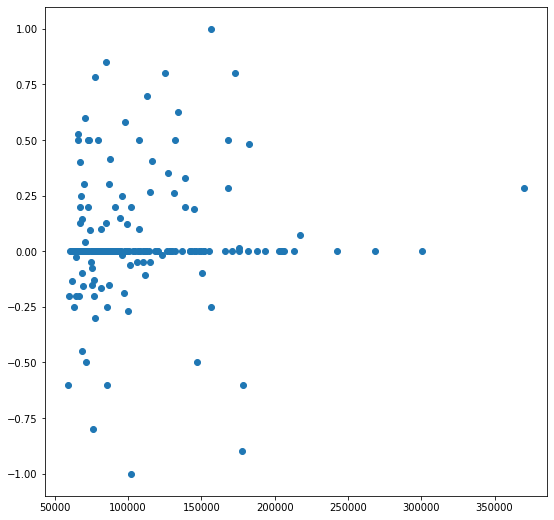

In [29]:
plt.figure(figsize=(9,9))
plt.scatter(train_data.score, train_data.sentiment)
plt.show()